In [1]:
import pandas as pd
import numpy as pn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

<h1>Load the Dataset</h1>

In [2]:
df = pd.read_csv('/Users/shreeyadaga/Documents/college/Sem6/DSBDA/DSBDALExam DataSets/DSBDALExam DataSets/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## a. Histograms

**Objective:**  
Visualize the distribution of each numerical feature to understand central tendency, spread, skewness, and identify potential outliers.

**Functions Used:**  
 `.hist()`  
 `plt.figure()`

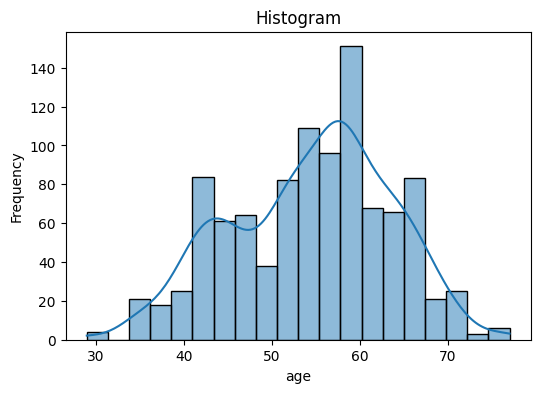

In [5]:
# Histogram of all numeric columns

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age',kde=True, bins=20)
plt.title("Histogram")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.show()

a. Histograms Objective: To show the distribution of a single numerical variable (e.g., age, cholesterol). It helps identify skewness, modality, and spread.



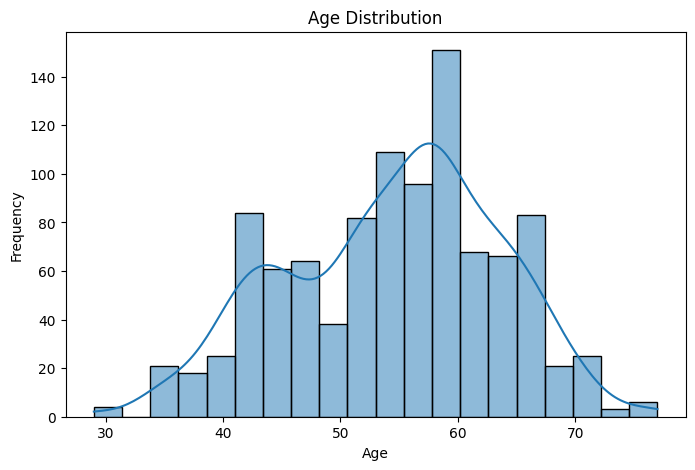

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## b. Pie Charts

**Objective:**  
Show the proportion of categorical variables—e.g., sex and presence of heart disease (target)—to see class balance.

**Functions Used:**  
 `.value_counts()`  
 `.plot.pie()`  
 `.axes.set_ylabel()`


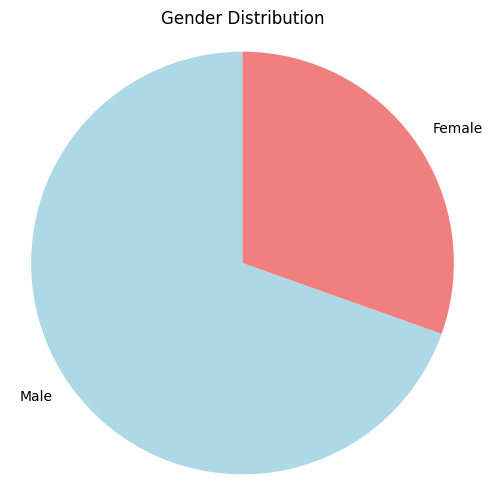

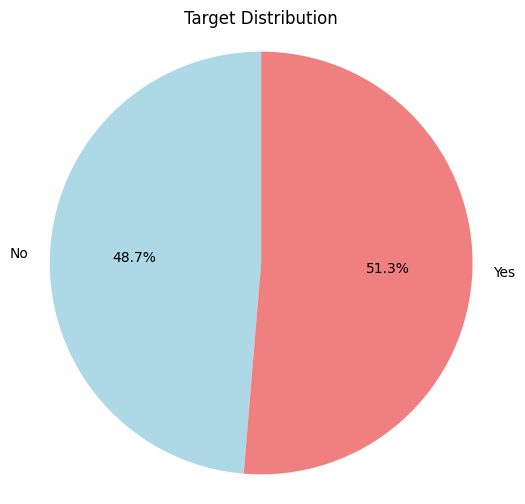

In [7]:
gender_counts = df['sex'].value_counts()
labels = ['Male', 'Female']
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=labels, , autopct='%1.1f%%'startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


target_counts = df['target'].value_counts().sort_index()

labels = ['No', 'Yes']
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Target Distribution')
plt.axis('equal')
plt.show()


## c. Box Plots

**Objective:**  
Compare distributions (median, quartiles, and outliers) of key numeric features, possibly stratified by the target class.

**Functions Used:**  
 `.boxplot()`  
 `plt.figure()`


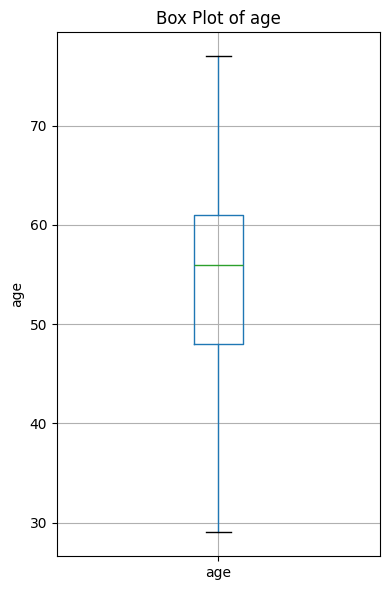

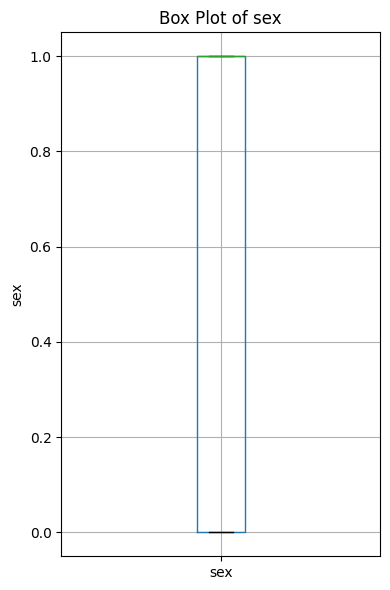

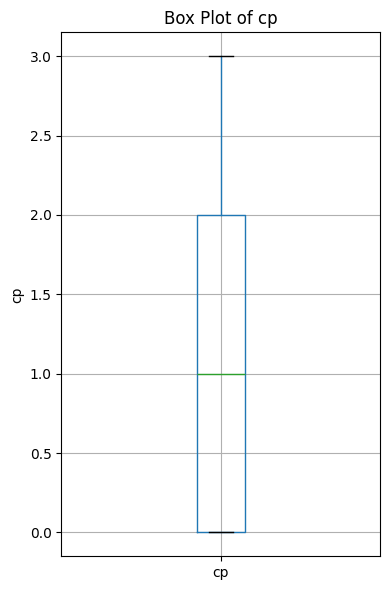

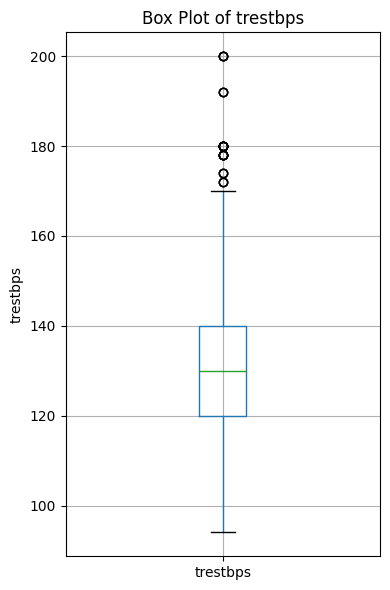

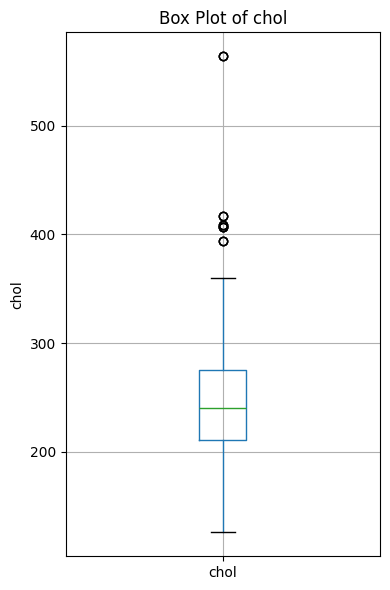

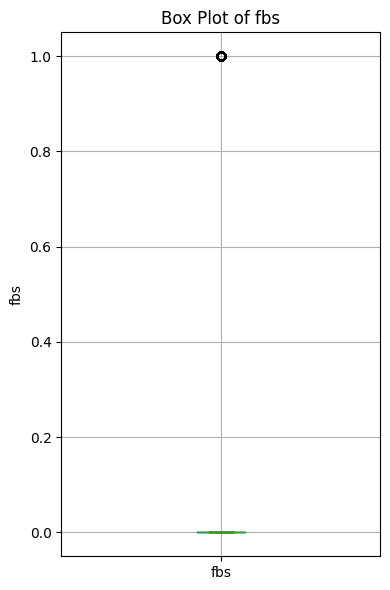

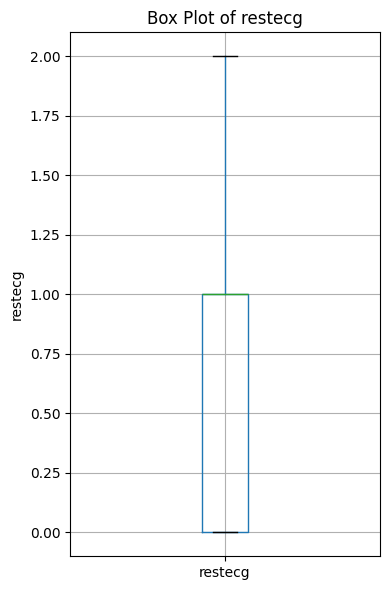

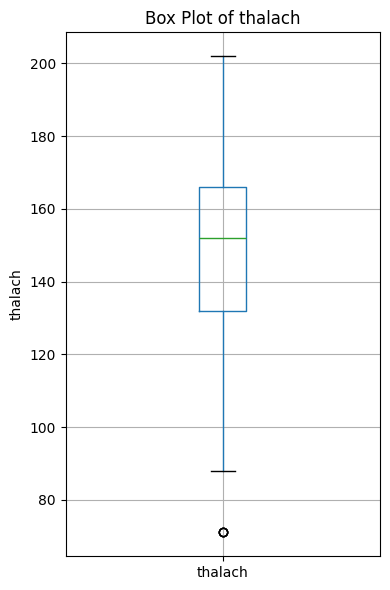

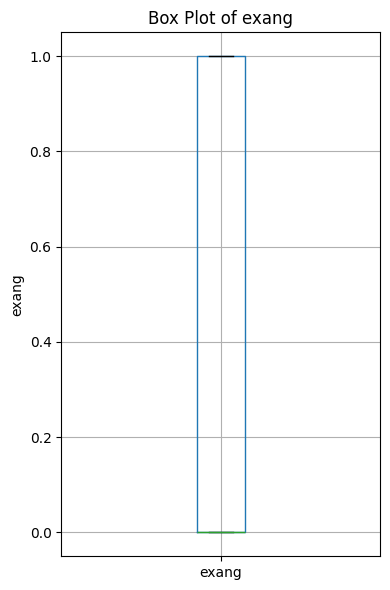

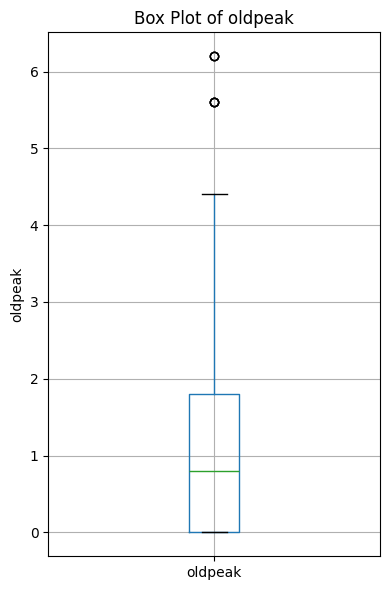

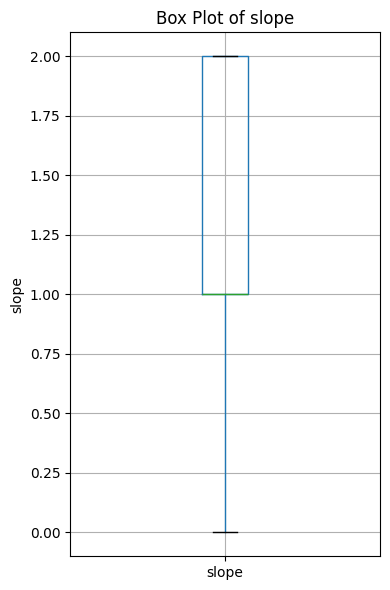

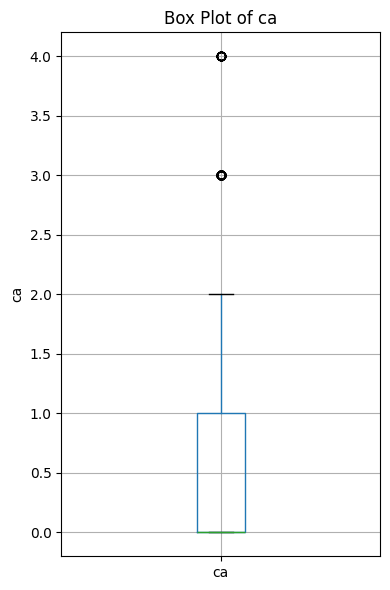

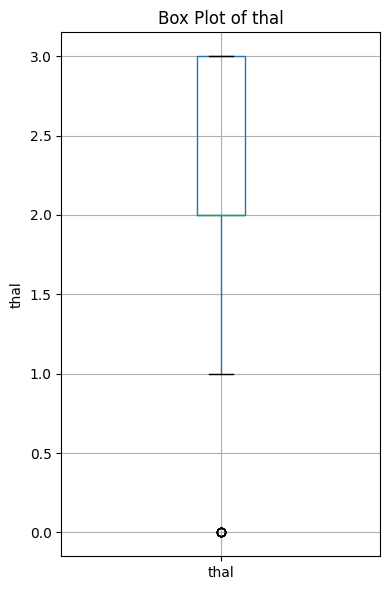

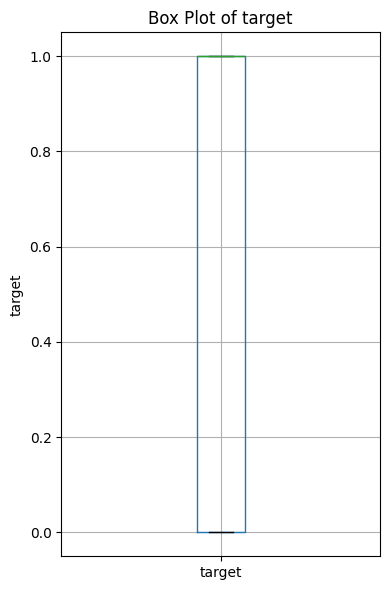

In [19]:
numeric_cols = ["age","sex","cp", "trestbps", "chol","fbs","restecg", "thalach","exang", "oldpeak", "slope","ca","thal","target"]

for col in numeric_cols:
    plt.figure(figsize=(4, 6)) # Initializes a new figure for plotting.
    # Method A: using DataFrame.boxplot
    df.boxplot(column=col) # Plots a box plot for the column
    #plt.boxplot(df[col], labels=[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.tight_layout()  # adjusts subplot parameters (marhins, paddings) so that axes labels, titles and tick labels don't overlap
    plt.show()

 d. Scatter Plots
Objective: To observe the relationship or correlation between two numerical variables (e.g., age vs. max heart rate).

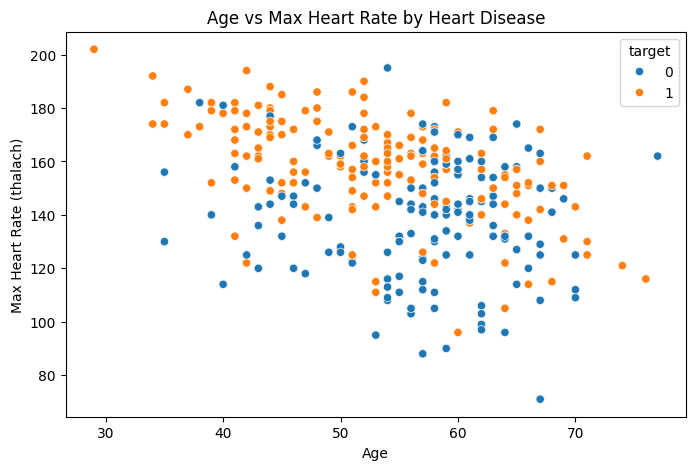

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='thalach', hue='target')
plt.title('Age vs Max Heart Rate by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()


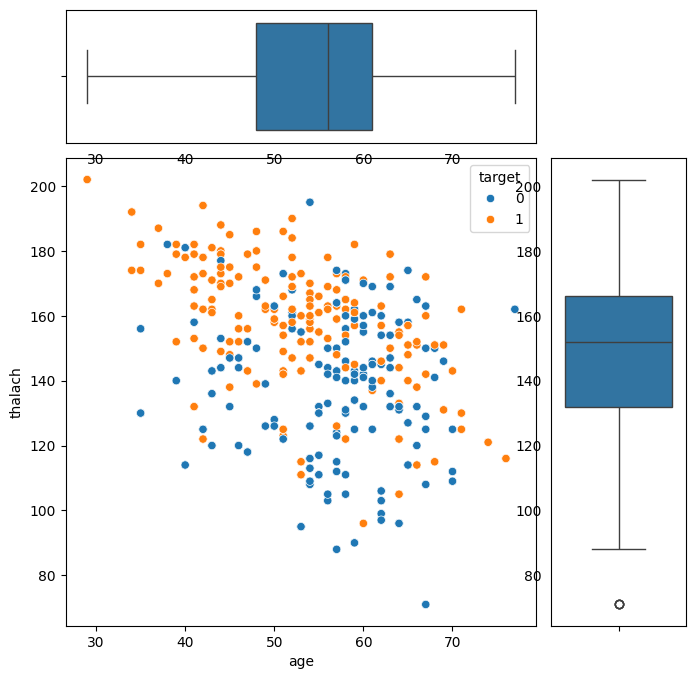

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

fig = plt.figure(figsize=(8, 8))

# 2×2 grid: main scatter at [1,0], boxplot-X at [0,0], boxplot-Y at [1,1]
gs = gridspec.GridSpec(
    2, 2,
    width_ratios=[7, 2],
    height_ratios=[2, 7],
    wspace=0.05,
    hspace=0.05
)

# rename axes
ax_scatter = plt.subplot(gs[1, 0])
ax_box_x   = plt.subplot(gs[0, 0], sharex=ax_scatter)  # top, shares X
ax_box_y   = plt.subplot(gs[1, 1], sharey=ax_scatter)  # right, shares Y

# 1) main scatter
sns.scatterplot(
    x='age', y='thalach',
    hue='target', data=df,
    ax=ax_scatter
)

# 2) horizontal boxplot above
sns.boxplot(
    x='age', data=df,
    ax=ax_box_x,
    orient='h'
)

# 3) vertical boxplot on the right
sns.boxplot(
    y='thalach', data=df,
    ax=ax_box_y,
    orient='v'
)

# clean up redundant labels & ticks
ax_box_x.set(xlabel='')         # no x‐label on the top boxplot
ax_box_x.tick_params(bottom=False)  # hide x ticks if you like
ax_box_y.set(ylabel='')         # no y‐label on the right boxplot
ax_box_y.tick_params(left=False)    # hide y ticks if you like

plt.show()


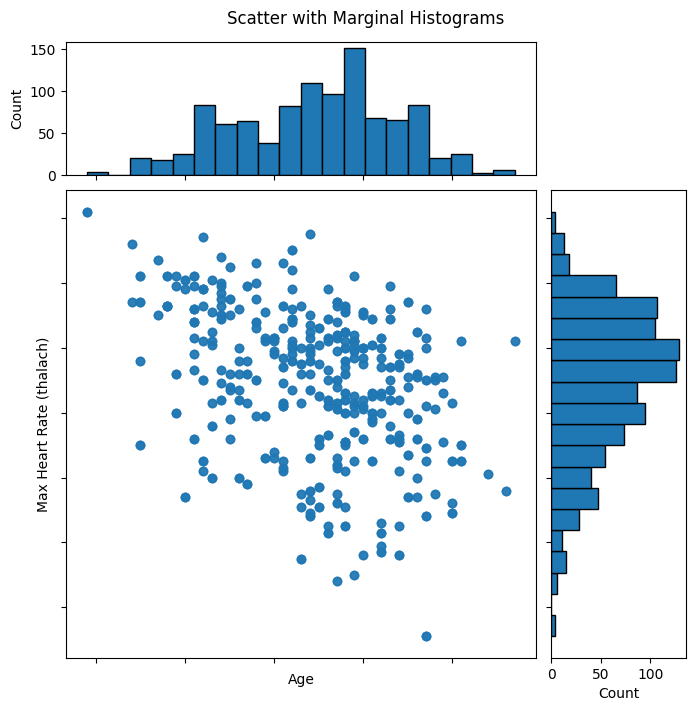

In [9]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[7, 2],
                       height_ratios=[2, 7],
                       wspace=0.05, hspace=0.05)

# Main scatter area
ax_scatter = plt.subplot(gs[1, 0])
# Top margin: for age histogram
ax_histx   = plt.subplot(gs[0, 0], sharex=ax_scatter)
# Right margin: for thalach histogram
ax_histy   = plt.subplot(gs[1, 1], sharey=ax_scatter)

# Scatter plot in the big panel
ax_scatter.scatter(df['age'], df['thalach'], alpha=0.6)
ax_scatter.set_xlabel('Age')
ax_scatter.set_ylabel('Max Heart Rate (thalach)')

# Marginal histogram (top) for Age
ax_histx.hist(df['age'], bins=20, edgecolor='black')
ax_histx.set_ylabel('Count')
ax_histx.set_xticklabels([])   # hide x-labels—scatter has them already
ax_histx.set_xlabel('')        # remove the empty xlabel

# Marginal histogram (right) for Thalach
ax_histy.hist(df['thalach'], bins=20, orientation='horizontal', edgecolor='black')
ax_histy.set_xlabel('Count')
ax_histy.set_yticklabels([])   # hide y-labels—scatter has them already
ax_histy.set_ylabel('')        # remove the empty ylabel

plt.suptitle('Scatter with Marginal Histograms', y=0.92)
plt.show()
